['./sample_data/mnist_test.csv', './sample_data/mnist_train_small.csv']

In [29]:
import pandas as pd
import numpy as np
data = pd.read_csv('../data/mnist_train_small.csv')
data = np.array(data)
data1 = pd.DataFrame(data)
print(data1)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        7    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        2    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
19994    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19995    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19996    2    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19997    9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19998    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0       

In [31]:
y_train = data[:,1:]
x_train = data[:,0]
print(x_train)
#reshape 1차원 ->2차원
y_train = y_train.reshape(-1,28,28)


[5 7 9 ... 2 9 5]


5

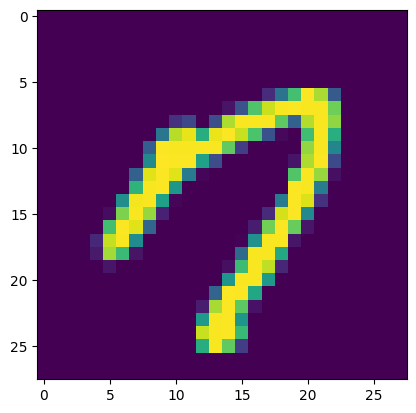

In [33]:
import matplotlib.pyplot as plt
plt.imshow(y_train[1,:,:])
x_train[0]

In [34]:
from keras.utils import to_categorical
x_train = to_categorical(x_train)
y_train = y_train/255

In [35]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [39]:
model = Sequential()
model.add(layers.Dense(units=3136,input_shape=(10,),activation='relu'))
model.add(layers.Reshape((7,7,64)))
#업셈플링 2배로  14개
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(filters=16,kernel_size=3,padding='same',
                        activation='relu'))
#업셈플링 2배로 ->28개
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=3,padding='same',
                        activation='relu'))
model.add(layers.Conv2D(filters=1,kernel_size=3,padding='same',
                        activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3136)              34496     
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        9232      
                                                                 
 up_sampling2d_3 (UpSampling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)       

In [40]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=64,
                 validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 14s 10ms/step - loss: 0.0596 - accuracy: 0.7917 - val_loss: 0.0541 - val_accuracy: 0.7952
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0541 - accuracy: 0.7921 - val_loss: 0.0541 - val_accuracy: 0.7990
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0539 - accuracy: 0.7928 - val_loss: 0.0537 - val_accuracy: 0.7988
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0538 - accuracy: 0.7931 - val_loss: 0.0534 - val_accuracy: 0.7953
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0537 - accuracy: 0.7932 - val_loss: 0.0534 - val_accuracy: 0.7954
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0537 - accuracy: 0.7934 - val_loss: 0.0534 - val_accuracy: 0.7927
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0537 - accuracy: 0.7934 - val_loss: 0.0533 - val_accuracy: 0.7948
Epoc

In [44]:
test_d = np.zeros((1,10))
test_d[0,7] = 1
o = model.predict(test_d)

1/1 [==============================] - 0s 11ms/step


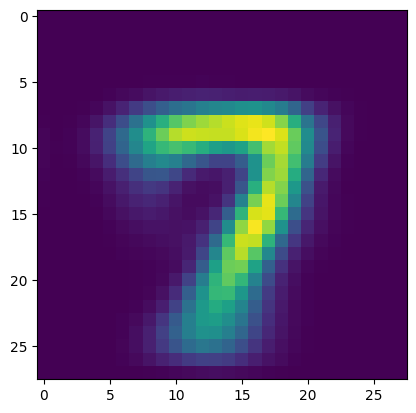

In [45]:
im = o.reshape((28,28))
plt.imshow(im)

1/1 [==============================] - 0s 37ms/step


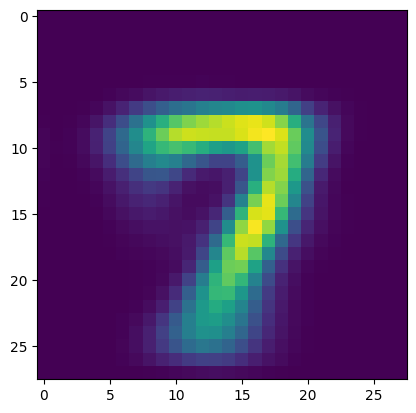

In [46]:
from keras.models import load_model
model.save('iris.h5')
new_model = load_model('iris.h5')


test_d = np.zeros((1,10))
test_d[0,7] = 1
o = new_model.predict(test_d)
im = o.reshape((28,28))
plt.imshow(im)